Frequenze cumulate : [ 153  378  713 1277 1623 1756 1831 1880]
Numero totale famiglie : 1880


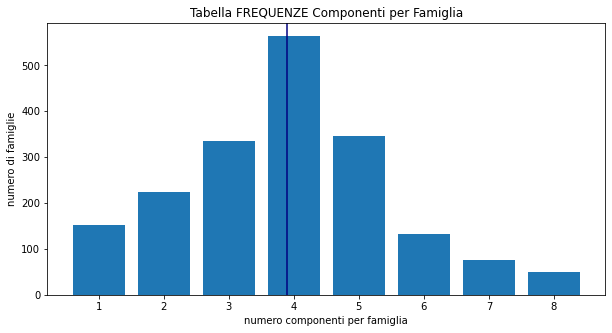

In [21]:
# ESEMPIO tratto da "Indici di centralità": TABELLA NUM. COMPONENTI per FAMIGLIA e NUMERO FAMIGLIE
# np (oggetti e metodi di NumPy in un namespace ad-hoc)
import numpy as np
# array (costruttore di oggetti ndarray presenti in NumPy e non in Python, che invece possiede liste e dizionari) 
ncfamiglia = np.array([1,2,3,4,5,6,7,8]) 
frequenza = np.array([153,225,335,564,346,133,75,49])
# visualizzazione istogramma delle frequenze con media ponderata (average)
import matplotlib.pyplot as plt
# visualizza le immagini all'interno del notebook in esecuzione
%matplotlib inline
# definisce l'area del grafico
plt.figure(figsize=(10,5))
# crea l'istogramma
plt.bar(ncfamiglia,frequenza)
plt.xlabel("numero componenti per famiglia")
plt.ylabel("numero di famiglie")
plt.title("Tabella FREQUENZE Componenti per Famiglia")
# disegna la retta corrispondente alla media ponderata: passo sia i valori che i rispettivi pesi (frequenze)
# axis=None indica che considera tutti gli elementi
plt.axvline(np.average(ncfamiglia,None,frequenza), c='navy')
# calcolo le frequenze cumulate e il numero totale di famiglie
print ("Frequenze cumulate :",np.cumsum(frequenza))
print ("Numero totale famiglie :",np.sum(frequenza))

array([(b'Raiuno', 7873), (b'Raidue', 2377), (b'Raitre', 2664),
       (b'Canale5', 7665), (b'Rete4', 2007), (b'Italia1', 3162),
       (b'La7',  910), (b'Altre', 1857)],
      dtype=[('Emittenti', 'S8'), ('Telespettatori', '<i4')])

dtype([('Emittenti', 'S8'), ('Telespettatori', '<i4')])

(8,)

<BarContainer object of 8 artists>

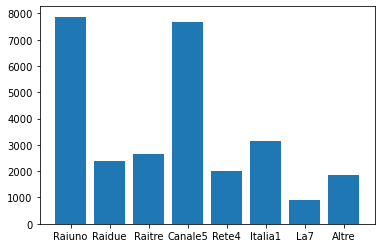

In [25]:
# VERSIONE 1
# lettura tabella Emittenti-Telespettatori da file CSV contenuto nella stessa cartella (VARIABILI QUALITATIVE NOMINALI)
# utilizzo la funzione di NumPy loadtxt() in quanto non ci sono valori mancanti nel file TV.csv.
# Il file viene convertito in un array MONODIMENSIONALE 
# e ogni elemento è un tipo strutturato definito attraverso il metodo np.dtype()
# nel nostro caso la struttura è costituita da una stringa di max 8 caratteri (S8) e un intero (i4 a 32 bit)
dtype1 = np.dtype([('Emittenti', 'S8'), ('Telespettatori', 'i4')])
# deve saltare la prima riga di intestazione : skiprows=1
# e il carattere di separazione tra i campi della struttura è : delimiter=';'
a = np.loadtxt('TV.csv', dtype=dtype1, skiprows=1, delimiter=';')
display(a,a.dtype,a.shape)
plt.bar(a['Emittenti'],a['Telespettatori'])
# essendo variabili qualitative non ordinali non ha senso fare le frequenze cumulate!

  Emittenti  Telespettatori
0    Raiuno            7873
1    Raidue            2377
2    Raitre            2664
3   Canale5            7665
4     Rete4            2007
5   Italia1            3162
6       La7             910
7     Altre            1857
Matrice valori: 
 [['Raiuno' 7873]
 ['Raidue' 2377]
 ['Raitre' 2664]
 ['Canale5' 7665]
 ['Rete4' 2007]
 ['Italia1' 3162]
 ['La7' 910]
 ['Altre' 1857]] 
 tipo= object 
 dimensione= (8, 2)
Matrice trasposta: 
 [['Raiuno' 'Raidue' 'Raitre' 'Canale5' 'Rete4' 'Italia1' 'La7' 'Altre']
 [7873 2377 2664 7665 2007 3162 910 1857]] 
 dimensione= (2, 8)


<BarContainer object of 8 artists>

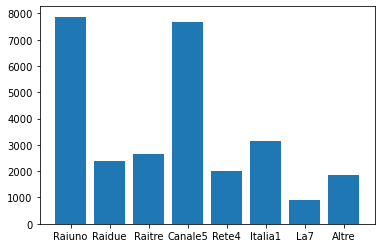

In [26]:
# VERSIONE 2
# lettura tabella Emittenti-Telespettatori da file CSV contenuto nella stessa cartella (VARIABILI QUALITATIVE NOMINALI)
# utilizzo la libreria Pandas con il comando read_csv() che importa il file come Dataframe
import pandas as pd
df = pd.read_csv('TV.csv',sep=';')
print (df)
# converto il dataframe in un array bidimensionale di Numpy di tipo object in quanto i tipi di dati nelle due colonne sono diversi
# (non considera la prima riga di intestazione del Dataframe)
tab = df.to_numpy()
print("Matrice valori: \n",tab,"\n tipo=",tab.dtype,"\n dimensione=",tab.shape)
# faccio la trasposizione dell'array (scambio righe per colonne)
tabT = tab.transpose()
print ("Matrice trasposta: \n",tabT,"\n dimensione=",tabT.shape)
plt.bar(tabT[0],tabT[1])
# essendo variabili qualitative non ordinali non ha senso fare le frequenze cumulate!

Valori unici       : [1 2 3 4 5 6]
Numero occorrenze  : [14 24 21 14 11 16]
Frequenze cumulate : [ 14  38  59  73  84 100]
Indici (prima occorrenza): [6 0 1 2 7 5]
Frequenze relative : [0.14 0.24 0.21 0.14 0.11 0.16]
Freq. cum.  rel. : [0.14 0.38 0.59 0.73 0.84 1.  ]
Moda            :  2


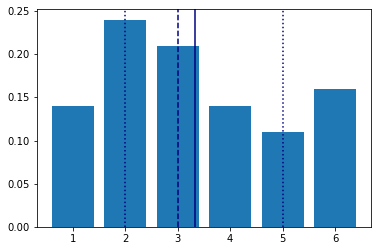

In [27]:
# SIMULAZIONE DEL LANCIO DI 100 DADI (VARIABILI QUANTITATIVE DISCRETE)
# importo la funzione mode() della libreria statistics di Python per il calcolo della moda:
# tale funzione genera un'eccezione nel caso si presentino più valori con la stessa frequenza massima (gestita con try...except)
# le altre funzioni statistiche utilizzate sono di NumPy
from statistics import mode
# rv=random var : size numeri casuali interi compresi tra 1 e (high-1)
# array di 100 interi casuali compresi tra 1 e 6
rv=np.random.randint(1,high=7,size=100)
#Estraggo i valori unici ed il numero di occorrenze per ogni valore (tabella delle frequenze assolute)
uniqueVal, occourC=np.unique(rv,return_counts=True)
#Estraggo i valori unici ed il primo indice di dove si trova 
uniqueVal, indexList=np.unique(rv,return_index=True)
#Calcolo le frequenze cumulate (ultima frequenza == size)
freqcum = np.cumsum(occourC)
#Calcolo la frequenza relativa: numero di occorrenze/(dimensione totale dell'array)
freqrel=occourC/occourC.sum()
#Calcolo le frequenze cumulate relative (ultima frequenza == 1.00)
freqcumrel = np.cumsum(freqrel)
#Per plottare le frequenze relative usero' : x= uniqueVal, y=freqrel
print ("Valori unici       :",uniqueVal)
print ("Numero occorrenze  :",occourC)
print ("Frequenze cumulate :",freqcum)
print ("Indici (prima occorrenza):",indexList)
print ("Frequenze relative :",freqrel)
print ("Freq. cum.  rel. :",freqcumrel)
# gestione dell'errore della funzione mode() nel caso la distribuzione NON sia UNImodale
try:
    print ("Moda            : ",mode(rv))
except ValueError:
    print("Distrubuzione NON UNImodale")
plt.bar(uniqueVal,freqrel)
# media con linea continua
plt.axvline(np.mean(rv), c='navy')
# mediana con linea tratteggiata
plt.axvline(np.median(rv), c='navy', linestyle='--')
# primo e terzo quartile con linea puntinata
plt.axvline(np.quantile(rv,0.25),c='navy', linestyle=':')
plt.axvline(np.quantile(rv,0.75),c='navy', linestyle=':')

In [28]:
# SIMULAZIONE DEL LANCIO DI 50 MONETE (Testa/Croce) (VARIABILI QUALITATIVE NOMINALI)
# creo un lista con i due valori T e C (o array mono-dimensionale monete = np.array(['T', 'C']))
monete = ['T', 'C']
# crea un array casuale di 50 valori scelti con ripetizione tra la lista monete
rm = np.random.choice(monete, 50)
print(rm)
#Estraggo i valori unici ed il numero di occorrenze per ogni valore T e C
uniqueVal, occourC=np.unique(rm,return_counts=True)
print(uniqueVal,occourC)
# gestione dell'errore della funzione mode() nel caso la distribuzione NON sia UNImodale
from statistics import mode
try:
    print ("Moda            : ",mode(rm))
except ValueError:
    print("Distrubuzione NON UNImodale")

['T' 'C' 'C' 'C' 'T' 'C' 'C' 'C' 'C' 'C' 'T' 'C' 'C' 'C' 'T' 'T' 'C' 'C'
 'C' 'T' 'C' 'C' 'T' 'T' 'T' 'T' 'C' 'T' 'T' 'T' 'C' 'T' 'T' 'T' 'C' 'C'
 'C' 'C' 'T' 'C' 'T' 'T' 'C' 'C' 'T' 'C' 'C' 'T' 'C' 'T']
['C' 'T'] [28 22]
Moda            :  C


In [29]:
# Lettura dei dati grezzi (senza frequenze) da eleborare da un file CSV




n. elementi: 18

INDICI di CENTRALITA'
media: 32.41111111111112 
media ponderata: 32.41111111111112
mediana: 31.9
Moda            :  30.6
primo quartile:  30.6
primo quartile:  30.6
secondo quartile:  31.9
terzo quartile:  34.2
terzo quartile:  34.2

INDICI di VARIABILITA'
campo di variazione:  5.300000000000001
campo di variazione interquartile:  3.6000000000000014
devianza: 65.41777777777781
varianza: 3.634320987654323 varianza campionaria: 3.8481045751634 varianza popolazione: 3.6343209876543225
deviazione standard: 1.9063895162464368 devstd campionaria: 1.9616586286006543 devstd popolazione: 1.9063895162464366

INDICI di FORMA
skew (indice di asimmetria) :  0.20937385147945184
kurt (indice di appiattimento) :  -1.5997444686568374


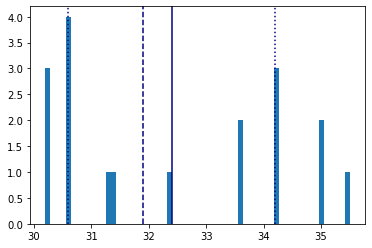

In [30]:
# Esempio calcolo INDICI di:
# CENTRALITA': media, moda, mediana, primo e terzo quartile
# VARIABILITA' : devianza (= momento ordine 2), varianza, deviazione standard, campo di variazione, campo di variazione interquartile
# FORMA : asimmetria (momento ordine 3 / dev.standard^3), Curtosi (momento ordine 4 / dev.standard^4 - 3)
#
# SIMMETRIA - ASIMMETRIA
# Una distribuzione di dati si dice simmetrica se esiste un valore che divide la distribuzione stessa in
# due parti, con gli elementi di ciascuna parte simmetrici dei corrispondenti elementi dell’altra parte.
# Se non esiste tale valore, la distribuzione è asimmetrica. 
# L’indice di asimmetria A misura la mancanza di simmetria della distribuzione di frequenza. In particolare:
# •	 Un indice di asimmetria positivo indica una distribuzione in cui i valori sono raggruppati nella
# parte dei valori bassi, con una lunga coda verso i valori maggiori: asimmetria a destra.
# •	 Il grafico della distribuzione risulta allungato verso destra.
# Un indice di asimmetria negativo indica la situazione opposta: asimmetria a sinistra.
# Il grafico della distribuzione risulta allungato verso sinistra.
# 
# CURTOSI
# L’indice K di curtosi misura il maggiore o minore appuntimento di una distribuzione di dati,
# rispetto alla distribuzione normale. Di conseguenza esso indica il maggiore o minore peso dei
# valori posti agli estremi della distribuzione (code), rispetto a quelli della parte centrale.
# Una forma di distribuzione più appuntita rispetto a quella della distribuzione normale, è detta
# leptocurtica, e l’indice K di curtosi risulta positivo.
# Una forma di distribuzione meno appuntita rispetto a quella della distribuzione normale, è detta
# platicurtica, e l’indice K di curtosi risulta negativo.
# •	 Indice di curtosi K = 0: forma normale
# •	 Indice di curtosi K > 0: forma leptocurtica
# •	 Indice di curtosi K < 0: forma platicurtica

from statistics import *
a = np.array([33.6, 34.2, 35.0, 30.6, 30.2, 31.4, 34.2, 35.0, 30.6, 30.2, 32.4, 30.6, 30.2, 35.5, 31.3, 34.2, 30.6, 33.6])
d = a.shape[0]
print('n. elementi:',d)
print("\nINDICI di CENTRALITA'")
print('media:',np.mean(a),'\nmedia ponderata:',np.average(a)) # media ponderata senza array dei pesi coincide con la media
print('mediana:',np.median(a))
try:
    print ("Moda            : ",mode(a))
except ValueError:
    print("Distrubuzione NON UNImodale")
print('primo quartile: ',np.quantile(a,0.25))
print('primo quartile: ', np.percentile(a,25))
print('secondo quartile: ',np.quantile(a,0.5))
print('terzo quartile: ',np.quantile(a,0.75))
print('terzo quartile: ', np.percentile(a,75))
print("\nINDICI di VARIABILITA'")
print('campo di variazione: ',np.amax(a)-np.amin(a))
print('campo di variazione interquartile: ',np.percentile(a,75)-np.percentile(a,25))
print('devianza:',np.var(a)*d)
print('varianza:',np.var(a),'varianza campionaria:', variance(a),'varianza popolazione:', pvariance(a))
print('deviazione standard:',np.std(a),'devstd campionaria:',stdev(a),'devstd popolazione:', pstdev(a))
from scipy.stats import kurtosis
from scipy.stats import skew
print("\nINDICI di FORMA")
print("skew (indice di asimmetria) : ",skew(a))
print("kurt (indice di appiattimento) : ",kurtosis(a))
plt.hist(a, bins=60)
plt.axvline(np.mean(a), c='navy')
plt.axvline(np.median(a), c='navy', linestyle='--')
# primo e terzo quartile con linea puntinata
plt.axvline(np.quantile(a,0.25),c='navy', linestyle=':')
plt.axvline(np.quantile(a,0.75),c='navy', linestyle=':')

lung. array 9


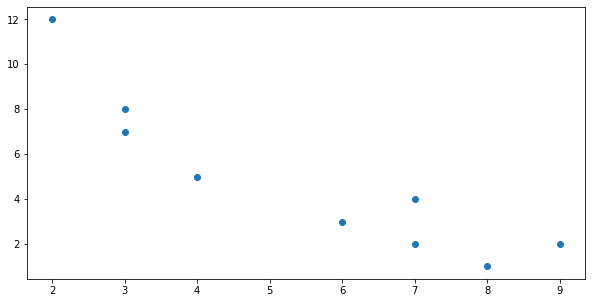

In [31]:
X = np.array([8,6,9,4,3,3,2,7,7]) 
Y = np.array([1,3,2,5,8,7,12,2,4])
d = np.size(X)
print ('lung. array',d)
# creazione di un grafico a dispersione con punti (X,Y): (8,1),(6,3),...,(7,4)
# per vedere la correlazione tra variabili
plt.figure(figsize=(10,5))
plt.scatter(X,Y)


In [32]:
# formula del coeff. di correlazione a partire dalla covarianza : covar(X,Y)/(devstd(X)*devstd(y))
# se X = Y covvar(X,Y) = var(X)
sX = np.std(X)   # devstd(X)
sY = np.std(Y)   # devstd(Y)
c = np.array([[sX*sX, sX*sY],[sY*sX, sY*sY]])   # matrice devstd(X)*devstd(Y)
print('devstd(X)=',sX,'    devstd(Y)=',sY)
display('covarianza campionaria(sizeArray - 1) fratto deviazioni standard (!= coeff. di correlazione) ',np.cov(X,Y)/c)
display('covarianza (divisa per sizeArray) fratto deviazioni standard (= coeff. di correlazione) ',np.cov(X,Y)*(d-1)/d/c)
display('coefficiente di correlazione',np.corrcoef(X,Y))

devstd(X)= 2.3622546250521443     devstd(Y)= 3.3481153718487473


'covarianza campionaria(sizeArray - 1) fratto deviazioni standard (!= coeff. di correlazione) '

array([[ 1.125     , -1.02027328],
       [-1.02027328,  1.125     ]])

'covarianza (divisa per sizeArray) fratto deviazioni standard (= coeff. di correlazione) '

array([[ 1.        , -0.90690958],
       [-0.90690958,  1.        ]])

'coefficiente di correlazione'

array([[ 1.        , -0.90690958],
       [-0.90690958,  1.        ]])

In [ ]:
# Mappa termica   HEAT MAP pag.129-130


(50,)

(50,)

'm:'

2.8301187690130383

'q:'

0.33694038158576256

'corr:'

0.9577649275682534

'err:'

0.1226427858425738

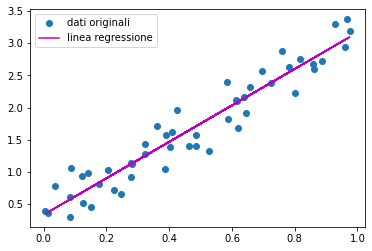

In [34]:
# RETTA DI REGRESSIONE
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
#Creare array x e y con 50 punti
# i valori di x sono compresi tra 0 e 1 escluso
x = np.random.random(50)
y = 2.5*x + np.random.random(50)
display( x.shape,y.shape )
# fare regressione: linregress(x,y) ritorna 5 valori calcolati
# 1) slope : float -  pendenza della retta di regressione
# 2) intercept : float - intercetta della retta di regressione
# 3) r_value : float - coefficiente di correlazione
# 4) p_value
# 5) std_err : float - standard error del gradiente stimato
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
display("m:",slope,"q:",intercept,"corr:",r_value,"err:",std_err)
# Visualizzare i dati raw e il fit (terzo parametro di plot sceglie il colore, il tipo di simbolo, il tipo di linea, ...)
fig,ax = plt.subplots()
ax.plot(x,y,'o',label='dati originali')
ax.plot(x, intercept + slope*x, 'm', label='linea regressione')
ax.legend()


In [75]:
# retta di regressione con Seaborn leggendo dati da un dataset (sito:    ????????????????)
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
#tips=sns.load_dataset("dataset????????")
#sns.regplot(x="total_bill", y="tip", data=tips)
#plt.show()